In [41]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

font_path = 'C:/Users/SeongJun/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.TTF'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

data = pd.read_csv("camping_loc.csv", encoding = "CP949")

map_osm = folium.Map(location=[36.48048, 127.72130], zoom_start = 7)

In [42]:
data2 = data.filter(['캠핑(야영)장명','주소', '위도', '경도'])
data2.head()

,캠핑(야영)장명,주소,위도,경도
0,최남단글램핑,제주특별자치도 서귀포시 최남단해안로 113-0,33.211782,126.255925
1,서건도카라반,제주특별자치도 서귀포시 이어도로 826-51,33.232536,126.500192
2,돌고래 하우스 카라반,제주특별자치도 서귀포시 강정동 이어도로 826-58,33.232731,126.499400
3,햇살정원 제주캠핑&민박,제주특별자치도 서귀포시 보목동 보목포로65번길 6,33.240415,126.608152
4,쇠소깍오토파크,제주특별자치도 서귀포시 하효동,33.249539,126.614507


In [43]:
def seperate(name) :
    s = "주소.str.contains('"+name+"', na = False)"
    return data.query(s)

In [44]:
def marking(data) :
    for i in data.index :
        name = data.loc[i, "캠핑(야영)장명"]
        lat = data.loc[i, '위도']
        lng = data.loc[i, '경도']
        
        marker = folium.Marker([lat, lng], popup = name)
        marker.add_to(map_osm)
        
    return map_osm

In [45]:
def main() :
    marking(seperate("강원"))
    marking(seperate("경기"))
    marking(seperate("충북"))
    marking(seperate("충남"))
    marking(seperate("경북"))
    marking(seperate("경남"))
    marking(seperate("전북"))
    marking(seperate("전남"))
    marking(seperate("제주"))
    
    return map_osm

In [46]:
main()

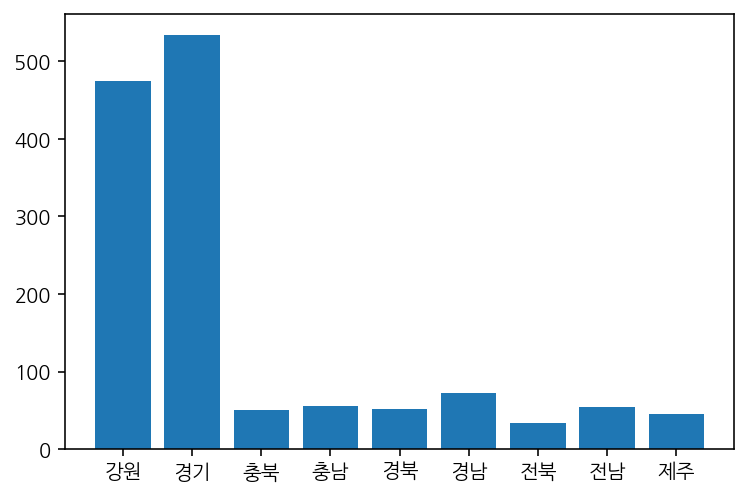

In [47]:
data = [len(seperate("강원")), len(seperate("경기")), len(seperate("충북")), len(seperate("충남")), len(seperate("경북")), len(seperate("경남")), len(seperate("전북")), len(seperate("전남")), len(seperate("제주"))]
label = ["강원", "경기", "충북", "충남", "경북", "경남", "전북", "전남", "제주"]

x = range(len(data))
plt.bar(x, data)
plt.xticks(x, label)

plt.show()